In [2]:
# import os
# import pandas as pd

# path = 'dataset/validation_set'

# label_mapping = {
#     "surprise": 1,
#     "fear": 2,
#     "disgust": 3,
#     "happiness": 4,
#     "sadness": 5,
#     "anger": 6
# }

# image_data = []

# for filename in os.listdir(path):
#     if filename.endswith(".jpg"):  
#         label_name = filename.split('_')[1].split('.')[0]
#         label_value = label_mapping.get(label_name)
#         if label_value is not None:  
#             image_data.append([filename, label_value])

# df = pd.DataFrame(image_data, columns=["ImageName", "Label"])

# csv_file_path = 'dataset/vali_labels.csv'

# df.to_csv(csv_file_path, index=False, header=False)

# print(f"CSV file created at: {csv_file_path}")

CSV file created at: dataset/vali_labels.csv


In [14]:
import torch
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import numpy as np
import torch.optim as optim
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [20]:
# param_grid = {
#     'lr': [0.1, 0.01, 0.001, 0.0001], 
#     'batch_size': [8, 16, 32, 64],  
#     # 'num_epochs':[3, 5, 10, 15, 20],
# }
# grid = ParameterGrid(param_grid)
# results = []

In [2]:
# import os
# import pandas as pd
# from PIL import Image
# from torch.utils.data import Dataset
# import torch

# class RAFDBDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         self.labels = pd.read_csv(csv_file)
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
#         image = Image.open(img_name)
#         label = self.labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)

#         return image, label

In [25]:
from rafdb_dataset import RAFDBDataset

transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])

rafdb_dataset_train = RAFDBDataset(csv_file='archive/train_labels.csv',
                             img_dir='archive/DATASET/train',
                             transform=transform)

rafdb_dataset_vali = RAFDBDataset(csv_file='dataset/vali_labels.csv',
                            img_dir='dataset/validation_set',
                            transform=transform)

# rafdb_dataset_test = RAFDBDataset(csv_file='archive/test_labels.csv',
#                             img_dir='archive/DATASET/test',
#                             transform=transform)

In [26]:
data_train_loader = DataLoader(rafdb_dataset_train, batch_size=8, shuffle=True, num_workers=4)

data_vali_loader = DataLoader(rafdb_dataset_vali, batch_size=8, shuffle=False, num_workers=0)

# data_test_loader = DataLoader(rafdb_dataset_test, batch_size=8, shuffle=False, num_workers=0)

In [8]:
train_image, train_label = next(iter(data_train_loader))
print(f"Train batch: image shape {train_image.shape}, labels shape {train_label.shape}")

Train batch: image shape torch.Size([8, 3, 64, 64]), labels shape torch.Size([8])


In [9]:
vali_image, vali_label = next(iter(data_vali_loader))
print(f"Train batch: image shape {vali_image.shape}, labels shape {vali_label.shape}")

Train batch: image shape torch.Size([8, 3, 64, 64]), labels shape torch.Size([8])


In [6]:
# test_image, test_label = next(iter(data_test_loader))
# print(f"Train batch: image shape {test_image.shape}, labels shape {test_label.shape}")

Train batch: image shape torch.Size([8, 3, 64, 64]), labels shape torch.Size([8])


In [18]:
# class EmotionClassifier(nn.Module):
#     def __init__(self):
#         super(EmotionClassifier, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.pool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc1 = nn.Linear(128, 1024)
#         self.dropout = nn.Dropout(0.5)
#         self.fc2 = nn.Linear(1024, 6)

#     def forward(self, x):
#         x = F.relu(self.bn1(F.max_pool2d(self.conv1(x), 2)))
#         x = F.relu(self.bn2(F.max_pool2d(self.conv2(x), 2)))
#         x = F.relu(self.bn3(F.max_pool2d(self.conv3(x), 2)))
#         x = self.pool(x)
#         x = x.view(-1, 128)
#         x = self.dropout(F.relu(self.fc1(x)))
#         x = self.fc2(x)
#         return x

In [28]:
import torch.nn as nn
import torchvision.models as models

class EmotionClassifier(nn.Module):
    def __init__(self, num_classes=6):
        super(EmotionClassifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)
    
    def forward(self, x):
        return self.resnet(x)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class BasicBlock(nn.Module):
#     expansion = 1

#     def __init__(self, in_planes, planes, stride=1):
#         super(BasicBlock, self).__init__()
#         self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(planes)
#         self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(planes)

#         self.shortcut = nn.Sequential()
#         if stride != 1 or in_planes != self.expansion * planes:
#             self.shortcut = nn.Sequential(
#                 nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
#                 nn.BatchNorm2d(self.expansion * planes)
#             )

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.bn2(self.conv2(out))
#         out += self.shortcut(x)
#         out = F.relu(out)
#         return out

# class ResNet(nn.Module):
#     def __init__(self, block, num_blocks, num_classes=6):
#         super(ResNet, self).__init__()
#         self.in_planes = 64

#         self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(512 * block.expansion, num_classes)

#     def _make_layer(self, block, planes, num_blocks, stride):
#         strides = [stride] + [1]*(num_blocks-1)
#         layers = []
#         for stride in strides:
#             layers.append(block(self.in_planes, planes, stride))
#             self.in_planes = planes * block.expansion
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = self.layer1(out)
#         out = self.layer2(out)
#         out = self.layer3(out)
#         out = self.layer4(out)
#         out = self.avgpool(out)
#         out = out.view(out.size(0), -1)
#         out = self.fc(out)
#         return out

# def EmotionClassifierResNet18():
#     return ResNet(BasicBlock, [2, 2, 2, 2])

# model = EmotionClassifierResNet18().to(device)


In [23]:
# for params in grid: # Hyperparameter tuning 
#     data_train_loader = DataLoader(rafdb_dataset_train, batch_size=params['batch_size'], shuffle=True, num_workers=4)
#     data_vali_loader = DataLoader(rafdb_dataset_vali, batch_size=params['batch_size'], shuffle=False, num_workers=0)
    
#     model = EmotionClassifier().to(device)
#     optimizer = optim.Adam(model.parameters(), lr=params['lr'])
#     criterion = nn.CrossEntropyLoss()
    
#     best_val_acc = 0
#     num_epochs = 15
    
#     for epoch in range(num_epochs):
#         model.train()
#         for i, data in enumerate(tqdm(data_train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"), 0):
#             inputs, labels = data[0].to(device), data[1].to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#     model.eval()
#     val_correct = 0
#     val_total = 0
#     with torch.no_grad():
#         for data in data_vali_loader:
#             inputs, labels = data[0].to(device), data[1].to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             val_total += labels.size(0)
#             val_correct += (predicted == labels).sum().item()
    
#     val_acc = val_correct / val_total
#     best_val_acc = max(best_val_acc, val_acc)
    
#     results.append({
#         'lr': params['lr'],
#         'batch_size': params['batch_size'],
#         'best_val_acc': best_val_acc,
#     })

# for result in results:
#     print(f"LR: {result['lr']}, Batch Size: {result['batch_size']}, Best Val Acc: {result['best_val_acc']}")

# best_params = max(results, key=lambda x: x['best_val_acc'])
# print(f"Best params: {best_params}")

Epoch 1/15:   0%|          | 0/1219 [00:00<?, ?it/s]

Epoch 15/15: 100%|██████████| 153/153 [00:26<00:00,  5.78it/s]


LR: 0.1, Batch Size: 8, Best Val Acc: 0.1669449081803005
LR: 0.01, Batch Size: 8, Best Val Acc: 0.332220367278798
LR: 0.001, Batch Size: 8, Best Val Acc: 0.5308848080133556
LR: 0.0001, Batch Size: 8, Best Val Acc: 0.5058430717863105
LR: 0.1, Batch Size: 16, Best Val Acc: 0.1669449081803005
LR: 0.01, Batch Size: 16, Best Val Acc: 0.4006677796327212
LR: 0.001, Batch Size: 16, Best Val Acc: 0.5091819699499165
LR: 0.0001, Batch Size: 16, Best Val Acc: 0.41235392320534225
LR: 0.1, Batch Size: 32, Best Val Acc: 0.1669449081803005
LR: 0.01, Batch Size: 32, Best Val Acc: 0.44908180300500833
LR: 0.001, Batch Size: 32, Best Val Acc: 0.5025041736227045
LR: 0.0001, Batch Size: 32, Best Val Acc: 0.4273789649415693
LR: 0.1, Batch Size: 64, Best Val Acc: 0.1669449081803005
LR: 0.01, Batch Size: 64, Best Val Acc: 0.4607679465776294
LR: 0.001, Batch Size: 64, Best Val Acc: 0.4240400667779633
LR: 0.0001, Batch Size: 64, Best Val Acc: 0.3739565943238731
Best params: {'lr': 0.001, 'batch_size': 8, 'best_v

In [29]:
best_params = {'lr': 0.001, 'batch_size': 8}
model = EmotionClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])

patience = 5  
best_val_acc = 0  
patience_counter = 0

num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(tqdm(data_train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"), 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(data_train_loader)}")
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in data_vali_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_acc = val_correct / val_total
    print(f"Epoch {epoch+1}, Validation Accuracy: {val_acc}")
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0 
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        print(f"No improvement in validation accuracy for {patience_counter} epochs.")
    
    if patience_counter > patience:
        print("Stopping early due to lack of improvement in validation accuracy.")
        break


/Users/wery/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/wery/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/50: 100%|██████████| 1219/1219 [01:39<00:00, 12.29it/s]


Epoch 1, Loss: 0.8740035831573755
Epoch 1, Validation Accuracy: 0.4524207011686144


Epoch 2/50: 100%|██████████| 1219/1219 [01:31<00:00, 13.32it/s]


Epoch 2, Loss: 0.6408160483133021
Epoch 2, Validation Accuracy: 0.5525876460767947


Epoch 3/50: 100%|██████████| 1219/1219 [01:33<00:00, 13.01it/s]


Epoch 3, Loss: 0.5227922467020943
Epoch 3, Validation Accuracy: 0.5843071786310517


Epoch 4/50: 100%|██████████| 1219/1219 [01:33<00:00, 12.99it/s]


Epoch 4, Loss: 0.45178857227058516
Epoch 4, Validation Accuracy: 0.5559265442404007
No improvement in validation accuracy for 1 epochs.


Epoch 5/50: 100%|██████████| 1219/1219 [01:30<00:00, 13.41it/s]


Epoch 5, Loss: 0.35714203208332335
Epoch 5, Validation Accuracy: 0.5742904841402338
No improvement in validation accuracy for 2 epochs.


Epoch 6/50: 100%|██████████| 1219/1219 [01:31<00:00, 13.36it/s]


Epoch 6, Loss: 0.29082195302991043
Epoch 6, Validation Accuracy: 0.5876460767946577


Epoch 7/50: 100%|██████████| 1219/1219 [01:29<00:00, 13.60it/s]


Epoch 7, Loss: 0.2254800717776123
Epoch 7, Validation Accuracy: 0.5893155258764607


Epoch 8/50: 100%|██████████| 1219/1219 [01:33<00:00, 13.10it/s]


Epoch 8, Loss: 0.2549071842604
Epoch 8, Validation Accuracy: 0.6227045075125208


Epoch 9/50: 100%|██████████| 1219/1219 [01:31<00:00, 13.38it/s]


Epoch 9, Loss: 0.13519591431565495
Epoch 9, Validation Accuracy: 0.5959933222036727
No improvement in validation accuracy for 1 epochs.


Epoch 10/50: 100%|██████████| 1219/1219 [01:32<00:00, 13.17it/s]


Epoch 10, Loss: 0.12622066262358786
Epoch 10, Validation Accuracy: 0.5375626043405676
No improvement in validation accuracy for 2 epochs.


Epoch 11/50: 100%|██████████| 1219/1219 [01:31<00:00, 13.34it/s]


Epoch 11, Loss: 0.12607025591301554
Epoch 11, Validation Accuracy: 0.6010016694490818
No improvement in validation accuracy for 3 epochs.


Epoch 12/50: 100%|██████████| 1219/1219 [01:30<00:00, 13.53it/s]


Epoch 12, Loss: 0.08297002687419966
Epoch 12, Validation Accuracy: 0.5792988313856428
No improvement in validation accuracy for 4 epochs.


Epoch 13/50: 100%|██████████| 1219/1219 [01:32<00:00, 13.14it/s]


Epoch 13, Loss: 0.07232424190437432
Epoch 13, Validation Accuracy: 0.6010016694490818
No improvement in validation accuracy for 5 epochs.


Epoch 14/50: 100%|██████████| 1219/1219 [01:31<00:00, 13.32it/s]


Epoch 14, Loss: 0.08243804944741479
Epoch 14, Validation Accuracy: 0.6176961602671118
No improvement in validation accuracy for 6 epochs.
Stopping early due to lack of improvement in validation accuracy.


In [12]:
def test_model(model, test_loader, device, criterion):
    model.eval()  
    test_loss = 0.0
    correct = 0
    total = 0
    losses = []
    accuracies = []

    with torch.no_grad(): 
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            losses.append(loss.item())
            accuracies.append(100.0 * (predicted == labels).sum().item() / labels.size(0))

    average_loss = test_loss / len(test_loader)
    average_accuracy = 100 * correct / total
    print(f'Average Loss: {average_loss:.4f}, Accuracy: {average_accuracy:.2f}%')

    return losses, accuracies

Average Loss: 0.8940, Accuracy: 52.92%


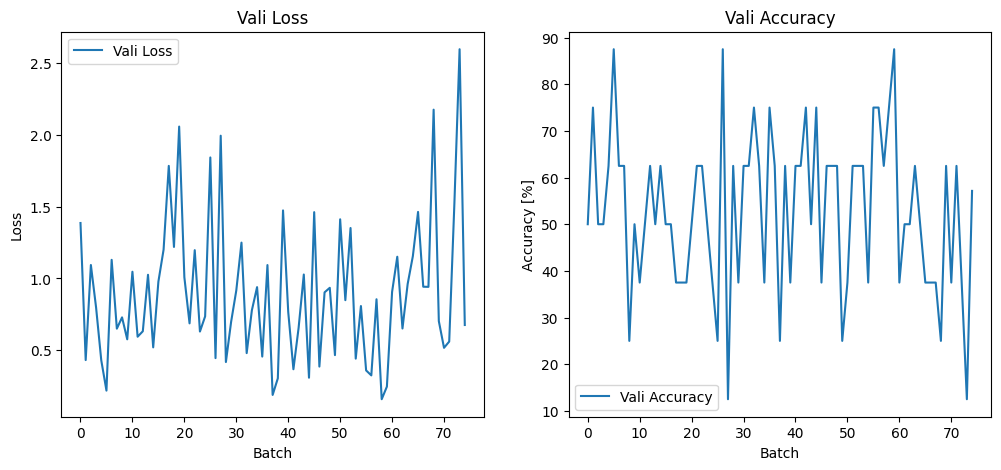

In [13]:
losses, accuracies = test_model(model, data_vali_loader, device, criterion)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Vali Loss')
plt.title('Vali Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Vali Accuracy')
plt.title('Vali Accuracy')
plt.xlabel('Batch')
plt.ylabel('Accuracy [%]')
plt.legend()

plt.show()

Average Loss: 0.5882, Accuracy: 72.91%


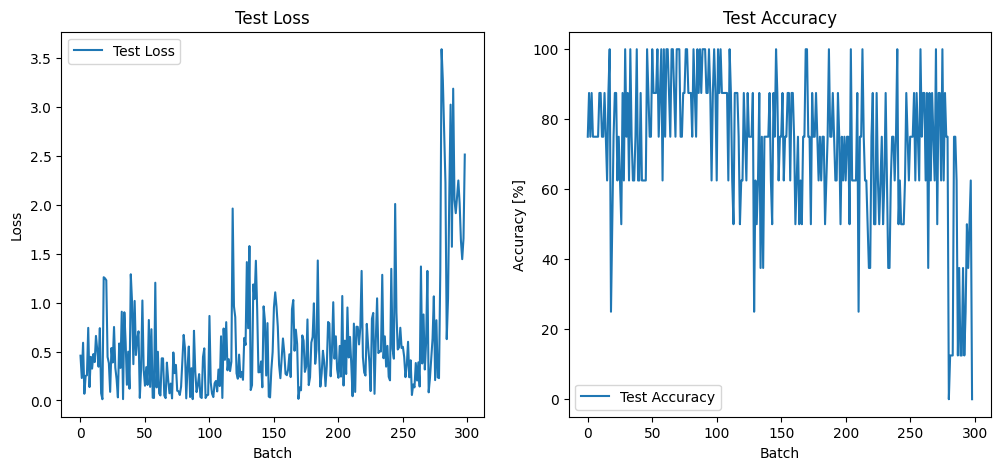

In [10]:
# losses, accuracies = test_model(model, data_test_loader, device, criterion)

# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(losses, label='Test Loss')
# plt.title('Test Loss')
# plt.xlabel('Batch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(accuracies, label='Test Accuracy')
# plt.title('Test Accuracy')
# plt.xlabel('Batch')
# plt.ylabel('Accuracy [%]')
# plt.legend()

# plt.show()

In [15]:
class_labels = ['happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']
num_classes = len(class_labels)
num_images_per_class = 4

total_images = num_classes * num_images_per_class
class_images = {label: [] for label in range(num_classes)}